In [1]:
import uproot as up
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import mplhep as hep
hep.style.use(hep.style.CMS)
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from fit_types import fit_unbinned_double_gauss, fit_unbinned_gauss

Welcome to JupyROOT 6.26/10


In [2]:
# open the file
file = up.open("analyzer_output.root")

# get the tree
events = file["demo/ntuple"]
events.show()

df = events.arrays(library='pd')

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Run                  | float                    | AsDtype('>f4')
LumiBlock            | float                    | AsDtype('>f4')
Event                | float                    | AsDtype('>f4')
Z_mass               | float                    | AsDtype('>f4')
Z_px                 | float                    | AsDtype('>f4')
Z_py                 | float                    | AsDtype('>f4')
Z_pz                 | float                    | AsDtype('>f4')
Z_pt                 | float                    | AsDtype('>f4')
Z_eta                | float                    | AsDtype('>f4')
Z_phi                | float                    | AsDtype('>f4')
Z_rapidity           | float                    | AsDtype('>f4')
Z_Vtx_mass           | float                    | AsDtype('>f4')
Z_Vtx_Px             | float                    | AsDtype(

After per-selection:
Events: 710, Z candidates: 1043
After Mass cut:
Events: 655, Z candidates: 695
After prob cut:
Events: 612, Z candidates: 625


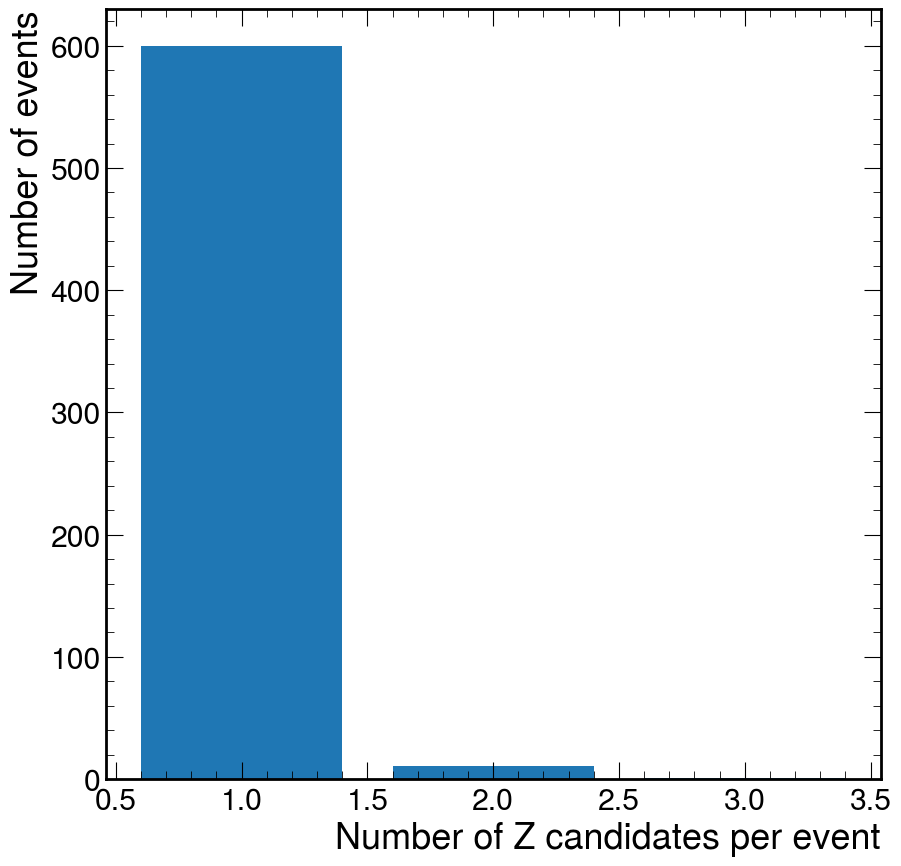

In [3]:
print("After per-selection:")
print(f"Events: {df.Event.unique().size}, Z candidates: {df.Z_mass.size}")

df = df[(df.Z_Vtx_mass >= 70) & (df.Z_Vtx_mass <=110)]
print("After Mass cut:")
print(f"Events: {df.Event.unique().size}, Z candidates: {df.Z_mass.size}")

df = df[(df.Z_Vtx_Prob > 0.03)]
print("After prob cut:")
print(f"Events: {df.Event.unique().size}, Z candidates: {df.Z_mass.size}")

unique, counts = np.unique(df.value_counts('Event') , return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Number of Z candidates per event')
plt.ylabel('Number of events')

# for each event with more than one Z candidate, keep only the one with the highest probability
c = df.value_counts('Event')
c = c[c > 1]

indices_to_drop = []
for index in c.index:
    indices_to_drop.append( df[(df.Event == index) & (df.Z_Vtx_Prob < df[df.Event == index].Z_Vtx_Prob.max())].index )

# drop the indices
df = df.drop(np.concatenate(indices_to_drop))

In [4]:
df

,Run,LumiBlock,Event,Z_mass,Z_px,Z_py,Z_pz,Z_pt,Z_eta,Z_phi,...,muP_fit_pt,muP_fit_ptError,muP_fit_eta,muP_fit_phi,muP_fit_charge,muM_fit_pt,muM_fit_ptError,muM_fit_eta,muM_fit_phi,muM_fit_charge
2,1.0,1.0,2.0,92.920471,38.964149,-7.513472,-224.187607,39.681953,-2.432476,-0.190492,...,68.541748,1.218637,-1.697124,-0.222253,1.0,29.448143,0.440186,-1.168194,2.876240,-1.0
5,1.0,1.0,4.0,90.608139,-5.661991,-12.231997,109.101479,13.478868,2.788097,-2.004313,...,34.083508,0.334819,0.417164,1.653539,1.0,46.783825,0.825088,1.458380,-1.631826,-1.0
8,1.0,1.0,7.0,93.560432,9.181417,156.345581,-207.030624,156.614944,-1.091739,1.512139,...,94.140991,1.790480,-1.412985,1.319620,1.0,67.092415,0.726165,-0.373572,1.783951,-1.0
11,1.0,1.0,9.0,92.916962,1.385740,-28.265167,209.903564,28.299116,2.701478,-1.521809,...,37.632225,1.020280,2.258904,-2.754795,1.0,38.474087,0.407419,0.790304,-0.377751,-1.0
12,1.0,1.0,11.0,90.383453,-50.239944,15.760359,-74.881187,52.653973,-1.150782,2.837613,...,44.969913,0.485950,-0.332986,-2.256803,1.0,55.056152,0.779181,-0.939045,1.977006,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,1.0,1.0,995.0,94.391678,-267.757141,-25.436779,-473.328644,268.962677,-1.330765,-3.046877,...,255.846603,9.280379,-1.369364,-3.030105,1.0,11.494711,0.088923,0.161925,2.850009,-1.0
1035,1.0,1.0,996.0,85.354713,-24.611483,-1.182371,72.169846,24.639868,1.795748,-3.093588,...,34.775414,0.578317,1.641740,-2.680235,1.0,15.763200,0.169633,-0.815351,1.141829,-1.0
1039,1.0,1.0,998.0,95.937660,-7.239407,16.021839,-73.678131,17.581476,-2.139948,1.995185,...,42.999901,0.436684,-0.045216,1.158003,1.0,33.652363,0.559183,-1.498128,-2.380780,-1.0
1041,1.0,1.0,999.0,94.509087,19.645443,-23.264101,198.311859,30.449333,2.572766,-0.869531,...,37.028545,0.524391,0.859143,0.840941,1.0,50.815861,1.212473,1.875288,-1.668620,-1.0


In [5]:
Z_candidates = df.Z_Vtx_mass.to_numpy()
Z_mass = ROOT.RooRealVar("Z_mass", "DiMuon invariant Mass", min(Z_candidates), max(Z_candidates), "GeV")
data = ROOT.RooDataSet.from_numpy({f"Z_mass": Z_candidates}, [Z_mass])

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (gaussian,background_model)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 background  -1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     2 f_bkg        5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     3 f_sig        5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     4 mean         9.12000e+01  1.00000e+00    8.50000e+01  9.50000e+01
     5 sigma        2.00000e+00  9.50000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 *

Info in <TCanvas::Print>: png file Z_candidates.png has been created


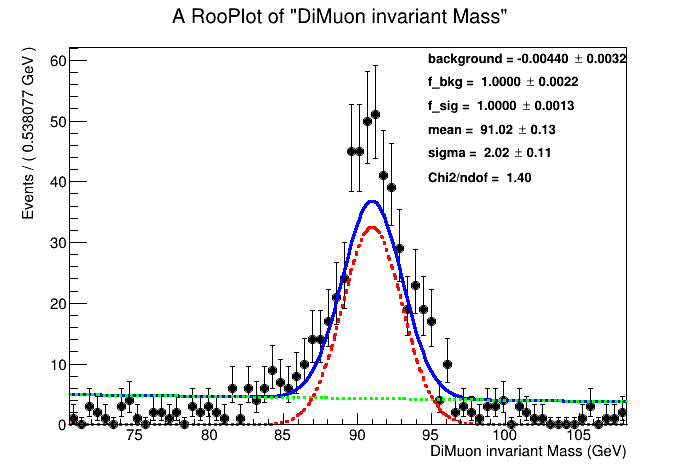

In [6]:
frame = fit_unbinned_gauss(data, Z_mass)
# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Z Candidates")
frame.Draw()
canvas.Draw()
canvas.SaveAs("Z_candidates.png")

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (gaussian1,gaussian2)
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 f_sig1       5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 mean1        9.12000e+01  1.00000e+00    8.50000e+01  9.50000e+01
     3 mean2        9.12000e+01  1.00000e+00    8.50000e+01  9.50000e+01
     4 sigma1       2.00000e+00  9.50000e-01    1.00000e-01  1.00000e+01
     5 sigma2       2.00000e+00  9.50000e-01    1.00000e-01  1.00000e+01
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 *******

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file Z_candidates_dg.png has been created


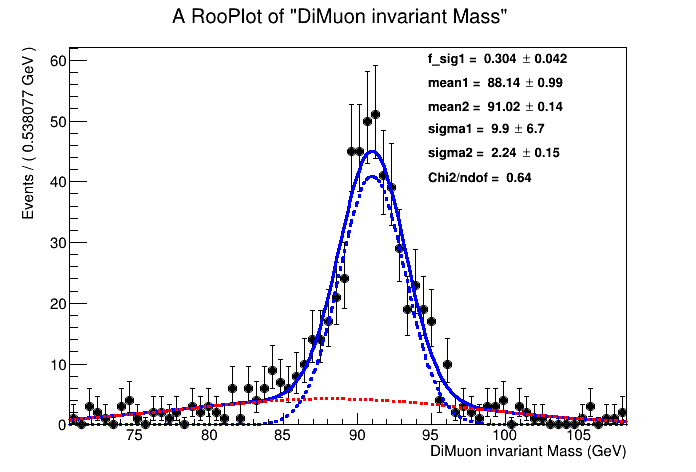

In [7]:
frame = fit_unbinned_double_gauss(data, Z_mass)
# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Z Candidates")
frame.Draw()
canvas.Draw()
canvas.SaveAs("Z_candidates_dg.png")

In [ ]:
plt.plot(abs(df['muP_fit_pt']-df['muP_pt']), df['muP_fit_ptError'], '.')
plt.xlabel('muP_fit_pt - muP_pt')
plt.ylabel('muP_fit_ptError')
plt.ylim(-0.1, 10)
plt.xlim(-0.1, 20)
# plt.xlim(-20, 20)

In [ ]:
df[df['muP_fit_eta'] < abs(1)]['muP_fit_ptError']

In [ ]:
plt.hist(df[df['muP_fit_eta'] < abs(1)]['muP_fit_ptError'], range=(0, 6), bins=70)
plt.hist(df[(df['muP_fit_eta'] < abs(2.4)) & (df['muP_fit_eta'] > abs(1.2))]['muP_fit_ptError'], range=(0, 6), bins=70)
plt.xlabel('muP_fit_ptError')
plt.ylabel('Number of events')
plt.legend(['|eta| < 1', '1.2 < |eta| < 2.4'])